# Handling Training Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('dataset/T13_train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# this si basically used to see the null values with the heatmap
import seaborn as sns

<AxesSubplot: >

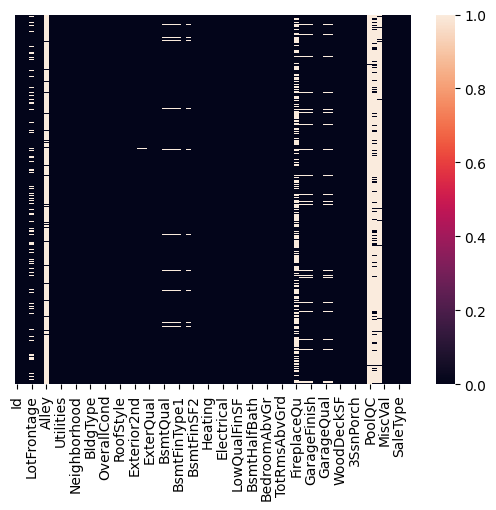

In [7]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True)

#### Step-2

In [8]:
# as we can see in 'LotFrontage' column there are 1201 non-null values and the data type is float64 so we can fill the null values with mean
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

#### Step-4

In [9]:
train_df['Alley'].isnull().sum()

1369

In [10]:
# we can see 1369/1460 is nul value in 'Alley' column, its better to drop this column
train_df.drop(['Alley'], axis=1, inplace=True)

#### Step-6
- here no null values we can find

In [11]:
train_df['Utilities'].isnull().sum(), train_df['Utilities'].value_counts()

(0,
 AllPub    1459
 NoSeWa       1
 Name: Utilities, dtype: int64)

#### step-10

In [12]:
train_df['MasVnrType'].isnull().sum(), train_df['MasVnrType'].value_counts()

(8,
 None       864
 BrkFace    445
 Stone      128
 BrkCmn      15
 Name: MasVnrType, dtype: int64)

In [13]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])

#### Step-12

In [14]:
train_df['MasVnrArea'].isnull().sum()

8

In [15]:
# As this column is of folat datatype, so the null value will be remove using mean
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

#### Step-14

In [16]:
# bellow five columns are categorical so filling the null values with there mode value
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])

In [17]:
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])

In [18]:
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])

#### Step-17

In [19]:
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [20]:
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])

#### Step-21

In [21]:
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])

#### Step-22

In [22]:
train_df.drop(['Id','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

#### Step-23

In [23]:
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

#### Step-24

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<AxesSubplot: >

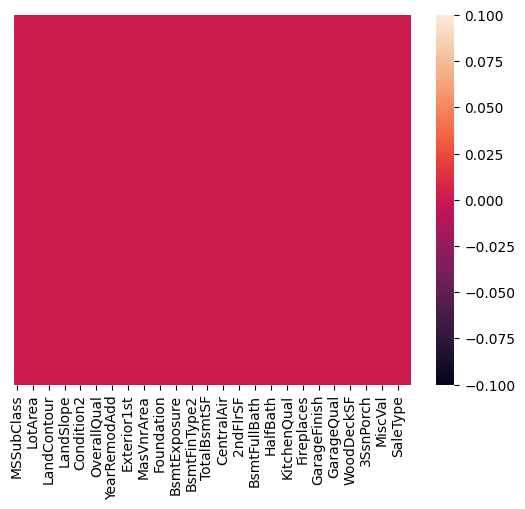

In [25]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True)

In [26]:
train_df.shape

(1460, 75)

# Handling Test Data

In [27]:
test_df = pd.read_csv('dataset/T13_test.csv')

In [28]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot: >

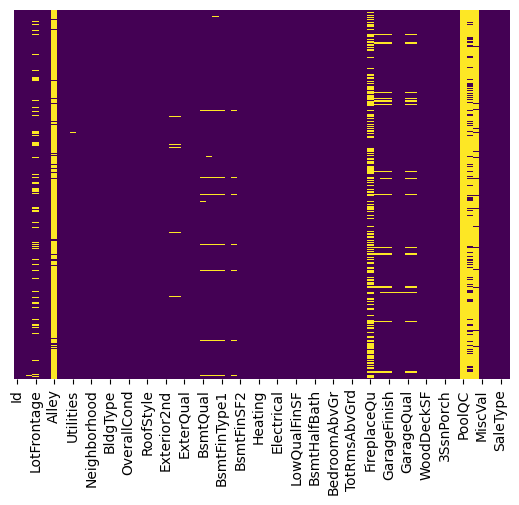

In [30]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Step-1 

In [31]:
# as we can see 'MSZoning' is of object data-type,means its categorical data
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [32]:
# taking out the numbers of null values in this particular column
test_df['MSZoning'].isnull().sum()
# as we found there are 4 null values, we will replace this 4 null values to the mode of this column

4

In [33]:
# replacing the null values with highest repeating categorical values
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

#### Step-3

In [34]:
## Fill Missing Values
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

#### Step-5

In [35]:
# As we have droped the 'Alley' column for training dataset, so there is no use while testing also
test_df.drop(['Alley'], axis=1, inplace=True)

#### Step-7

In [36]:
test_df['Utilities'].isnull().sum(), test_df['Utilities'].value_counts()

(2,
 AllPub    1457
 Name: Utilities, dtype: int64)

In [37]:
# we can see there are 2 null values and we have one category here
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])

#### Step-8
-  there is no need to change anything of this column in train dataeset

In [38]:
test_df['Exterior1st'].isnull().sum(), test_df['Exterior1st'].value_counts()

(1,
 VinylSd    510
 MetalSd    230
 HdBoard    220
 Wd Sdng    205
 Plywood    113
 CemntBd     65
 BrkFace     37
 WdShing     30
 AsbShng     24
 Stucco      18
 BrkComm      4
 AsphShn      1
 CBlock       1
 Name: Exterior1st, dtype: int64)

In [39]:
# we can find one null value, which will get filled with mode of the column
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])

#### Step-9

In [40]:
test_df['Exterior2nd'].isnull().sum(), test_df['Exterior2nd'].value_counts()

(1,
 VinylSd    510
 MetalSd    233
 HdBoard    199
 Wd Sdng    194
 Plywood    128
 CmentBd     66
 Wd Shng     43
 BrkFace     22
 Stucco      21
 AsbShng     18
 Brk Cmn     15
 ImStucc      5
 CBlock       2
 AsphShn      1
 Stone        1
 Name: Exterior2nd, dtype: int64)

In [41]:
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])

#### Step-11

In [42]:
test_df['MasVnrType'].isnull().sum(), test_df['MasVnrType'].value_counts()

(16,
 None       878
 BrkFace    434
 Stone      121
 BrkCmn      10
 Name: MasVnrType, dtype: int64)

In [43]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])

#### Step-13

In [44]:
test_df['MasVnrArea'].isnull().sum()

15

In [45]:
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())

#### Step-15

In [46]:
# bellow five columns are categorical so filling the null values with there mode value
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

In [47]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])

In [48]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

#### Step-16

In [49]:
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

#### Step-18

In [50]:
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])

In [51]:
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])

In [52]:
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])

#### Step-19

In [53]:
test_df.drop(['Id','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [54]:
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [55]:
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

#### Step-20

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

<AxesSubplot: >

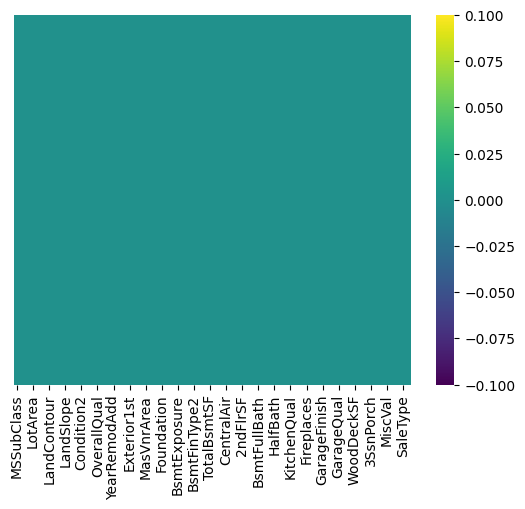

In [57]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [58]:
test_df.shape

(1459, 74)

# Handling Categorical Features

In [59]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [60]:
# we have 39 categorical features
len(columns)

39

- Now combining the training data and test data.
- Combining is the reason, some categorical column in train data have 3 categories and the same column in test have 4, so to overcome this problem and have same categories of each categorical column combining test and train data

In [61]:
# here axis=0 means we have to concatenate the dataset row wise
final_df = pd.concat([train_df, test_df], axis=0)

In [62]:
# remember in test dataset we don't have the column called saslesprice, so on concatenating we will have nan values for salesprice
final_df.shape

(2919, 75)

In [63]:
final_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

#### Applying One-Hot Encoding on categorical columns

In [64]:
def one_hot_encoding(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [65]:
final_df = one_hot_encoding(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [66]:
final_df.shape

(2919, 236)

In [67]:
# removing duplicatescolumn if available
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [68]:
final_df.shape

(2919, 176)

In [69]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 176 entries, MSSubClass to P
dtypes: float64(11), int64(25), uint8(140)
memory usage: 1.2 MB


In [71]:
train = final_df.iloc[:1460, :]
test = final_df.iloc[1460:, :]

In [72]:
train.shape, test.shape

((1460, 176), (1459, 176))

In [73]:
type(train), type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [74]:
test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\dhara\AppData\Local\Temp\ipykernel_9536\1092069152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['SalePrice'], axis=1, inplace=True)


In [75]:
test.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20         80.0    11622            5            6       1961   
1             20         81.0    14267            6            6       1958   
2             60         74.0    13830            5            5       1997   
3             60         78.0     9978            6            6       1998   
4            120         43.0     5005            8            5       1992   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd 

In [76]:
test.shape

(1459, 175)

In [78]:
# printing test caolumn names
list(test.columns.values)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',
 'RRAe',
 'RR

In [79]:
list(train.columns.values)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',

# Applying Linear Regression

In [80]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,1,0,0,1,0,0,0,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,1,1,0,0,0,0,0,0


In [81]:
train_input = train.drop(['SalePrice'],axis=1)
train_target = train['SalePrice']

In [82]:
train_input

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,1,0,0,1,0,0,0,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,1,1,0,0,0,0,0,0


In [83]:
train_target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [84]:
type(train_input), type(train_target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [85]:
train_target[4]

250000.0

In [86]:
# converting dataframe to numpy then to numpy to torch tensor
inputs = train_input.to_numpy()
targets = train_target.to_numpy()

In [87]:
type(inputs), type(targets)

(numpy.ndarray, numpy.ndarray)

In [88]:
targets

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [89]:
inputs

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [90]:
import torch
import torch.nn as nn

In [91]:
torch.set_default_dtype(torch.float64)

In [92]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [93]:
inputs, targets

(tensor([[6.0000e+01, 6.5000e+01, 8.4500e+03,  ..., 0.0000e+00, 1.0000e+00,
          0.0000e+00],
         [2.0000e+01, 8.0000e+01, 9.6000e+03,  ..., 0.0000e+00, 1.0000e+00,
          0.0000e+00],
         [6.0000e+01, 6.8000e+01, 1.1250e+04,  ..., 0.0000e+00, 1.0000e+00,
          0.0000e+00],
         ...,
         [7.0000e+01, 6.6000e+01, 9.0420e+03,  ..., 0.0000e+00, 1.0000e+00,
          0.0000e+00],
         [2.0000e+01, 6.8000e+01, 9.7170e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.0000e+01, 7.5000e+01, 9.9370e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([208500., 181500., 223500.,  ..., 266500., 142125., 147500.]))

In [94]:
inputs.shape, targets.shape

(torch.Size([1460, 175]), torch.Size([1460]))

In [95]:
targets = torch.reshape(targets, (len(targets), 1))

In [96]:
targets.shape

torch.Size([1460, 1])

#### Dataset And DataLoader

In [97]:
from torch.utils.data import DataLoader, TensorDataset, random_split

In [98]:
# Defining DataSet
train_ds = TensorDataset(inputs, targets)
train_ds[:3,:]

(tensor([[6.0000e+01, 6.5000e+01, 8.4500e+03, 7.0000e+00, 5.0000e+00, 2.0030e+03,
          2.0030e+03, 1.9600e+02, 7.0600e+02, 0.0000e+00, 1.5000e+02, 8.5600e+02,
          8.5600e+02, 8.5400e+02, 0.0000e+00, 1.7100e+03, 1.0000e+00, 0.0000e+00,
          2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 8.0000e+00, 0.0000e+00,
          2.0000e+00, 5.4800e+02, 0.0000e+00, 6.1000e+01, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0080e+03, 0.0000e+00,
          0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000

In [99]:
train_ds, val_ds = random_split(train_ds, [1200, 260])

In [100]:
len(train_ds), len(val_ds)

(1200, 260)

In [101]:
# Defining data loader
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [102]:
for xb, yb in train_dl:
    break
xb, yb

(tensor([[3.0000e+01, 5.0000e+01, 6.0000e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.0000e+01, 7.0050e+01, 1.0530e+04,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.0000e+01, 4.3000e+01, 3.1820e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [1.2000e+02, 3.8000e+01, 1.4963e+04,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [6.0000e+01, 8.2000e+01, 1.1287e+04,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.0000e+01, 6.0000e+01, 8.0720e+03,  ..., 1.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([[108500.],
         [143250.],
         [159895.],
         [212900.],
         [403000.],
         [155000.],
         [143000.],
         [133500.],
         [241500.],
         [167500.],
         [148000.],
         [214500.],
         [189000.],
         [378500.],
         [402000.],
         [147000.],
         [152000.],
         [106500.],
         [ 64500.],
         [

In [103]:
xb.shape, yb.shape

(torch.Size([100, 175]), torch.Size([100, 1]))

#### Defining the model

In [104]:
import torch.nn.functional as F

In [167]:
class AdvanceHousePrice(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(175, 1)
        self.history = []

    def prediction(self, inputs):
        return self.linear(inputs)

    def lossCal(self, batch):
        inputs, targets = batch
        pred = self.prediction(inputs)
        mse = F.mse_loss(pred, targets)
        loss = torch.sqrt(mse)
        return loss

    def validation_step(self, batch):
        inputs, _ = batch
        loss = self.lossCal(batch)
        return {'val_loss' : loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss' : epoch_loss.item()}

    def evaluate(self, val_loader):
        outputs = [self.validation_step(batch) for batch in val_loader]
        return self.validation_epoch_end(outputs)

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))

    def model_training(self, epochs, lr, train_dl, val_dl, opt_func=torch.optim.Adam):
        optimizer = opt_func(self.linear.parameters(), lr)

        for epoch in range(epochs):
            for batch in train_dl:
                loss = self.lossCal(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            result = self.evaluate(val_dl)
            self.epoch_end(epoch, result)
            self.history.append(result)

In [168]:
model = AdvanceHousePrice()

In [169]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0747, -0.0261, -0.0543,  0.0284, -0.0020,  0.0613,  0.0072, -0.0143,
          -0.0486,  0.0118, -0.0148, -0.0046, -0.0103,  0.0219, -0.0120,  0.0377,
          -0.0420,  0.0397,  0.0367, -0.0376, -0.0221, -0.0270, -0.0430, -0.0139,
          -0.0652, -0.0210, -0.0022, -0.0284, -0.0132, -0.0082, -0.0164, -0.0198,
          -0.0034, -0.0297,  0.0525,  0.0411,  0.0301,  0.0443,  0.0679, -0.0430,
           0.0632,  0.0282, -0.0619, -0.0158, -0.0248, -0.0383,  0.0681,  0.0378,
          -0.0101, -0.0474,  0.0126,  0.0575, -0.0350, -0.0180, -0.0231, -0.0583,
           0.0197,  0.0377, -0.0193, -0.0114,  0.0452,  0.0084, -0.0059,  0.0197,
          -0.0158, -0.0578,  0.0637, -0.0148,  0.0242, -0.0398,  0.0099,  0.0684,
          -0.0478,  0.0351, -0.0395,  0.0134, -0.0139,  0.0183,  0.0568, -0.0733,
           0.0199, -0.0578, -0.0638,  0.0662, -0.0598,  0.0107,  0.0301,  0.0451,
           0.0074,  0.0628,  0.0113, -0.0366, -0.0644, -0.0274, -0.0481, -0

In [170]:
model.model_training(50, 0.000001, train_dl, val_dl)

Epoch [0], val_loss: 201488.8369
Epoch [1], val_loss: 201488.5745
Epoch [2], val_loss: 201488.3137
Epoch [3], val_loss: 201488.0525
Epoch [4], val_loss: 201487.7901
Epoch [5], val_loss: 201487.5277
Epoch [6], val_loss: 201487.2668
Epoch [7], val_loss: 201487.0040
Epoch [8], val_loss: 201486.7419
Epoch [9], val_loss: 201486.4805
Epoch [10], val_loss: 201486.2195
Epoch [11], val_loss: 201485.9591
Epoch [12], val_loss: 201485.6962
Epoch [13], val_loss: 201485.4314
Epoch [14], val_loss: 201485.1715
Epoch [15], val_loss: 201484.9074
Epoch [16], val_loss: 201484.6467
Epoch [17], val_loss: 201484.3865
Epoch [18], val_loss: 201484.1245
Epoch [19], val_loss: 201483.8617
Epoch [20], val_loss: 201483.5973
Epoch [21], val_loss: 201483.3367
Epoch [22], val_loss: 201483.0747
Epoch [23], val_loss: 201482.8131
Epoch [24], val_loss: 201482.5494
Epoch [25], val_loss: 201482.2866
Epoch [26], val_loss: 201482.0264
Epoch [27], val_loss: 201481.7643
Epoch [28], val_loss: 201481.5028
Epoch [29], val_loss: 20

In [171]:
model.model_training(1000, 0.000001, train_dl, val_dl)

Epoch [0], val_loss: 201475.7344
Epoch [1], val_loss: 201475.4711
Epoch [2], val_loss: 201475.2088
Epoch [3], val_loss: 201474.9455
Epoch [4], val_loss: 201474.6842
Epoch [5], val_loss: 201474.4213
Epoch [6], val_loss: 201474.1591
Epoch [7], val_loss: 201473.9007
Epoch [8], val_loss: 201473.6381
Epoch [9], val_loss: 201473.3763
Epoch [10], val_loss: 201473.1127
Epoch [11], val_loss: 201472.8505
Epoch [12], val_loss: 201472.5876
Epoch [13], val_loss: 201472.3256
Epoch [14], val_loss: 201472.0642
Epoch [15], val_loss: 201471.8019
Epoch [16], val_loss: 201471.5420
Epoch [17], val_loss: 201471.2780
Epoch [18], val_loss: 201471.0156
Epoch [19], val_loss: 201470.7543
Epoch [20], val_loss: 201470.4933
Epoch [21], val_loss: 201470.2289
Epoch [22], val_loss: 201469.9693
Epoch [23], val_loss: 201469.7066
Epoch [24], val_loss: 201469.4442
Epoch [25], val_loss: 201469.1840
Epoch [26], val_loss: 201468.9227
Epoch [27], val_loss: 201468.6575
Epoch [28], val_loss: 201468.3948
Epoch [29], val_loss: 20

In [172]:
model.model_training(2000, 0.00001, train_dl, val_dl)

Epoch [0], val_loss: 201211.3968
Epoch [1], val_loss: 201208.7852
Epoch [2], val_loss: 201206.1658
Epoch [3], val_loss: 201203.5474
Epoch [4], val_loss: 201200.9214
Epoch [5], val_loss: 201198.3015
Epoch [6], val_loss: 201195.6987
Epoch [7], val_loss: 201193.0481
Epoch [8], val_loss: 201190.4332
Epoch [9], val_loss: 201187.8167
Epoch [10], val_loss: 201185.2128
Epoch [11], val_loss: 201182.5774
Epoch [12], val_loss: 201179.9575
Epoch [13], val_loss: 201177.3370
Epoch [14], val_loss: 201174.7241
Epoch [15], val_loss: 201172.1147
Epoch [16], val_loss: 201169.4899
Epoch [17], val_loss: 201166.8628
Epoch [18], val_loss: 201164.2395
Epoch [19], val_loss: 201161.6154
Epoch [20], val_loss: 201159.0115
Epoch [21], val_loss: 201156.4079
Epoch [22], val_loss: 201153.7699
Epoch [23], val_loss: 201151.1509
Epoch [24], val_loss: 201148.5253
Epoch [25], val_loss: 201145.8995
Epoch [26], val_loss: 201143.2795
Epoch [27], val_loss: 201140.6611
Epoch [28], val_loss: 201138.0457
Epoch [29], val_loss: 20

In [173]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 195962.3665
Epoch [1], val_loss: 195936.2495
Epoch [2], val_loss: 195910.2733
Epoch [3], val_loss: 195884.1065
Epoch [4], val_loss: 195858.0971
Epoch [5], val_loss: 195832.0646
Epoch [6], val_loss: 195806.0839
Epoch [7], val_loss: 195779.9125
Epoch [8], val_loss: 195753.7276
Epoch [9], val_loss: 195727.7711
Epoch [10], val_loss: 195701.7241
Epoch [11], val_loss: 195675.6447
Epoch [12], val_loss: 195649.7100
Epoch [13], val_loss: 195623.7235
Epoch [14], val_loss: 195597.7582
Epoch [15], val_loss: 195571.8393
Epoch [16], val_loss: 195545.6733
Epoch [17], val_loss: 195519.5880
Epoch [18], val_loss: 195493.6857
Epoch [19], val_loss: 195467.5266
Epoch [20], val_loss: 195441.3961
Epoch [21], val_loss: 195415.2488
Epoch [22], val_loss: 195389.2473
Epoch [23], val_loss: 195363.3579
Epoch [24], val_loss: 195337.2609
Epoch [25], val_loss: 195311.1645
Epoch [26], val_loss: 195285.1765
Epoch [27], val_loss: 195259.1067
Epoch [28], val_loss: 195232.9929
Epoch [29], val_loss: 19

In [174]:
model.model_training(5000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 170382.0678
Epoch [1], val_loss: 170356.7670
Epoch [2], val_loss: 170331.6136
Epoch [3], val_loss: 170306.4026
Epoch [4], val_loss: 170281.1662
Epoch [5], val_loss: 170256.0202
Epoch [6], val_loss: 170230.7686
Epoch [7], val_loss: 170205.6357
Epoch [8], val_loss: 170180.4979
Epoch [9], val_loss: 170155.2651
Epoch [10], val_loss: 170130.0238
Epoch [11], val_loss: 170104.9045
Epoch [12], val_loss: 170079.7439
Epoch [13], val_loss: 170054.4935
Epoch [14], val_loss: 170029.3067
Epoch [15], val_loss: 170004.1691
Epoch [16], val_loss: 169978.9855
Epoch [17], val_loss: 169953.7247
Epoch [18], val_loss: 169928.5376
Epoch [19], val_loss: 169903.5877
Epoch [20], val_loss: 169878.4393
Epoch [21], val_loss: 169853.1347
Epoch [22], val_loss: 169828.0989
Epoch [23], val_loss: 169802.8940
Epoch [24], val_loss: 169777.7311
Epoch [25], val_loss: 169752.5302
Epoch [26], val_loss: 169727.4501
Epoch [27], val_loss: 169702.3753
Epoch [28], val_loss: 169677.1684
Epoch [29], val_loss: 16

In [175]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 84608.0219
Epoch [1], val_loss: 84600.7792
Epoch [2], val_loss: 84594.0464
Epoch [3], val_loss: 84587.5261
Epoch [4], val_loss: 84580.2736
Epoch [5], val_loss: 84573.3555
Epoch [6], val_loss: 84567.1541
Epoch [7], val_loss: 84559.7134
Epoch [8], val_loss: 84552.6861
Epoch [9], val_loss: 84545.8205
Epoch [10], val_loss: 84538.6420
Epoch [11], val_loss: 84531.9361
Epoch [12], val_loss: 84524.6218
Epoch [13], val_loss: 84518.3477
Epoch [14], val_loss: 84511.7215
Epoch [15], val_loss: 84504.1471
Epoch [16], val_loss: 84497.6577
Epoch [17], val_loss: 84491.4502
Epoch [18], val_loss: 84484.2133
Epoch [19], val_loss: 84477.6511
Epoch [20], val_loss: 84471.2463
Epoch [21], val_loss: 84464.2685
Epoch [22], val_loss: 84456.6333
Epoch [23], val_loss: 84449.3095
Epoch [24], val_loss: 84442.9662
Epoch [25], val_loss: 84436.3186
Epoch [26], val_loss: 84429.3980
Epoch [27], val_loss: 84422.7920
Epoch [28], val_loss: 84416.6787
Epoch [29], val_loss: 84408.7368
Epoch [30], val_loss

In [176]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 79187.4599
Epoch [1], val_loss: 79182.9632
Epoch [2], val_loss: 79178.9931
Epoch [3], val_loss: 79174.5952
Epoch [4], val_loss: 79170.2332
Epoch [5], val_loss: 79165.7639
Epoch [6], val_loss: 79161.5481
Epoch [7], val_loss: 79157.2808
Epoch [8], val_loss: 79152.7732
Epoch [9], val_loss: 79148.4874
Epoch [10], val_loss: 79143.8063
Epoch [11], val_loss: 79139.6750
Epoch [12], val_loss: 79135.3207
Epoch [13], val_loss: 79130.8599
Epoch [14], val_loss: 79126.6347
Epoch [15], val_loss: 79122.1890
Epoch [16], val_loss: 79117.8675
Epoch [17], val_loss: 79113.3132
Epoch [18], val_loss: 79108.6873
Epoch [19], val_loss: 79104.7879
Epoch [20], val_loss: 79100.9752
Epoch [21], val_loss: 79096.6964
Epoch [22], val_loss: 79092.3127
Epoch [23], val_loss: 79088.0146
Epoch [24], val_loss: 79083.2670
Epoch [25], val_loss: 79079.0320
Epoch [26], val_loss: 79074.6927
Epoch [27], val_loss: 79069.9624
Epoch [28], val_loss: 79065.7059
Epoch [29], val_loss: 79061.4778
Epoch [30], val_loss

In [177]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 75752.6380
Epoch [1], val_loss: 75749.7824
Epoch [2], val_loss: 75747.0913
Epoch [3], val_loss: 75744.5498
Epoch [4], val_loss: 75741.6199
Epoch [5], val_loss: 75738.8282
Epoch [6], val_loss: 75736.0254
Epoch [7], val_loss: 75733.1092
Epoch [8], val_loss: 75730.3445
Epoch [9], val_loss: 75727.4939
Epoch [10], val_loss: 75724.4424
Epoch [11], val_loss: 75721.6531
Epoch [12], val_loss: 75718.8391
Epoch [13], val_loss: 75715.9485
Epoch [14], val_loss: 75713.2067
Epoch [15], val_loss: 75710.4221
Epoch [16], val_loss: 75707.7093
Epoch [17], val_loss: 75704.8023
Epoch [18], val_loss: 75702.0885
Epoch [19], val_loss: 75699.2611
Epoch [20], val_loss: 75696.4007
Epoch [21], val_loss: 75693.5306
Epoch [22], val_loss: 75690.7206
Epoch [23], val_loss: 75687.9202
Epoch [24], val_loss: 75685.1333
Epoch [25], val_loss: 75682.2949
Epoch [26], val_loss: 75679.5690
Epoch [27], val_loss: 75676.8598
Epoch [28], val_loss: 75674.0503
Epoch [29], val_loss: 75671.3169
Epoch [30], val_loss

In [178]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 73506.2942
Epoch [1], val_loss: 73504.3039
Epoch [2], val_loss: 73502.4275
Epoch [3], val_loss: 73500.4385
Epoch [4], val_loss: 73498.4948
Epoch [5], val_loss: 73496.6223
Epoch [6], val_loss: 73494.6131
Epoch [7], val_loss: 73492.6714
Epoch [8], val_loss: 73490.7303
Epoch [9], val_loss: 73488.8058
Epoch [10], val_loss: 73486.8124
Epoch [11], val_loss: 73484.9450
Epoch [12], val_loss: 73483.0983
Epoch [13], val_loss: 73481.2143
Epoch [14], val_loss: 73479.2257
Epoch [15], val_loss: 73477.3474
Epoch [16], val_loss: 73475.4721
Epoch [17], val_loss: 73473.5969
Epoch [18], val_loss: 73471.6659
Epoch [19], val_loss: 73469.8392
Epoch [20], val_loss: 73467.9063
Epoch [21], val_loss: 73465.9648
Epoch [22], val_loss: 73464.2681
Epoch [23], val_loss: 73462.3952
Epoch [24], val_loss: 73460.5085
Epoch [25], val_loss: 73458.6280
Epoch [26], val_loss: 73456.7910
Epoch [27], val_loss: 73454.8565
Epoch [28], val_loss: 73452.9797
Epoch [29], val_loss: 73451.1305
Epoch [30], val_loss

In [179]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 71889.6878
Epoch [1], val_loss: 71888.4345
Epoch [2], val_loss: 71887.0577
Epoch [3], val_loss: 71885.6664
Epoch [4], val_loss: 71884.1276
Epoch [5], val_loss: 71882.7369
Epoch [6], val_loss: 71881.2352
Epoch [7], val_loss: 71879.8218
Epoch [8], val_loss: 71878.4254
Epoch [9], val_loss: 71877.0714
Epoch [10], val_loss: 71875.6915
Epoch [11], val_loss: 71874.2351
Epoch [12], val_loss: 71872.9618
Epoch [13], val_loss: 71871.5317
Epoch [14], val_loss: 71870.1816
Epoch [15], val_loss: 71868.7107
Epoch [16], val_loss: 71867.1984
Epoch [17], val_loss: 71865.7585
Epoch [18], val_loss: 71864.4055
Epoch [19], val_loss: 71862.8295
Epoch [20], val_loss: 71861.3593
Epoch [21], val_loss: 71859.9722
Epoch [22], val_loss: 71858.5128
Epoch [23], val_loss: 71856.9598
Epoch [24], val_loss: 71855.5032
Epoch [25], val_loss: 71854.0823
Epoch [26], val_loss: 71852.5161
Epoch [27], val_loss: 71851.0577
Epoch [28], val_loss: 71849.5739
Epoch [29], val_loss: 71848.1482
Epoch [30], val_loss

In [180]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 70525.9854
Epoch [1], val_loss: 70524.8463
Epoch [2], val_loss: 70523.6131
Epoch [3], val_loss: 70522.2858
Epoch [4], val_loss: 70520.9049
Epoch [5], val_loss: 70519.6999
Epoch [6], val_loss: 70518.2789
Epoch [7], val_loss: 70517.0927
Epoch [8], val_loss: 70515.7483
Epoch [9], val_loss: 70514.3173
Epoch [10], val_loss: 70513.0201
Epoch [11], val_loss: 70511.8762
Epoch [12], val_loss: 70510.5385
Epoch [13], val_loss: 70509.2249
Epoch [14], val_loss: 70508.0428
Epoch [15], val_loss: 70506.5864
Epoch [16], val_loss: 70505.2583
Epoch [17], val_loss: 70503.9586
Epoch [18], val_loss: 70502.6676
Epoch [19], val_loss: 70501.3880
Epoch [20], val_loss: 70500.0579
Epoch [21], val_loss: 70498.6770
Epoch [22], val_loss: 70497.3534
Epoch [23], val_loss: 70495.8188
Epoch [24], val_loss: 70494.5213
Epoch [25], val_loss: 70493.3654
Epoch [26], val_loss: 70491.8866
Epoch [27], val_loss: 70490.5378
Epoch [28], val_loss: 70489.3496
Epoch [29], val_loss: 70488.0174
Epoch [30], val_loss

In [181]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 69287.5297
Epoch [1], val_loss: 69286.5004
Epoch [2], val_loss: 69285.2703
Epoch [3], val_loss: 69284.0850
Epoch [4], val_loss: 69282.7871
Epoch [5], val_loss: 69281.6633
Epoch [6], val_loss: 69280.3621
Epoch [7], val_loss: 69279.2146
Epoch [8], val_loss: 69277.9050
Epoch [9], val_loss: 69276.8961
Epoch [10], val_loss: 69275.7013
Epoch [11], val_loss: 69274.6728
Epoch [12], val_loss: 69273.6997
Epoch [13], val_loss: 69272.3338
Epoch [14], val_loss: 69271.1884
Epoch [15], val_loss: 69269.9081
Epoch [16], val_loss: 69268.8193
Epoch [17], val_loss: 69267.5474
Epoch [18], val_loss: 69266.4805
Epoch [19], val_loss: 69265.4037
Epoch [20], val_loss: 69264.1436
Epoch [21], val_loss: 69263.1017
Epoch [22], val_loss: 69261.6784
Epoch [23], val_loss: 69260.5169
Epoch [24], val_loss: 69259.2655
Epoch [25], val_loss: 69258.1506
Epoch [26], val_loss: 69257.0993
Epoch [27], val_loss: 69255.8839
Epoch [28], val_loss: 69254.7327
Epoch [29], val_loss: 69253.5849
Epoch [30], val_loss

In [185]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 65666.2923
Epoch [1], val_loss: 65665.6160
Epoch [2], val_loss: 65664.9628
Epoch [3], val_loss: 65664.3783
Epoch [4], val_loss: 65663.9126
Epoch [5], val_loss: 65663.1855
Epoch [6], val_loss: 65662.5819
Epoch [7], val_loss: 65661.9269
Epoch [8], val_loss: 65661.3592
Epoch [9], val_loss: 65660.7006
Epoch [10], val_loss: 65660.1879
Epoch [11], val_loss: 65659.5641
Epoch [12], val_loss: 65658.8543
Epoch [13], val_loss: 65658.0422
Epoch [14], val_loss: 65657.6512
Epoch [15], val_loss: 65657.1420
Epoch [16], val_loss: 65656.3590
Epoch [17], val_loss: 65655.8438
Epoch [18], val_loss: 65655.4423
Epoch [19], val_loss: 65654.5489
Epoch [20], val_loss: 65653.9915
Epoch [21], val_loss: 65653.3533
Epoch [22], val_loss: 65652.6774
Epoch [23], val_loss: 65652.2315
Epoch [24], val_loss: 65651.5832
Epoch [25], val_loss: 65650.8743
Epoch [26], val_loss: 65650.2295
Epoch [27], val_loss: 65649.2813
Epoch [28], val_loss: 65648.7719
Epoch [29], val_loss: 65648.2382
Epoch [30], val_loss

In [186]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 65146.0207
Epoch [1], val_loss: 65145.4303
Epoch [2], val_loss: 65144.8598
Epoch [3], val_loss: 65144.5718
Epoch [4], val_loss: 65144.2853
Epoch [5], val_loss: 65143.9646
Epoch [6], val_loss: 65143.9939
Epoch [7], val_loss: 65143.5208
Epoch [8], val_loss: 65143.1452
Epoch [9], val_loss: 65142.6465
Epoch [10], val_loss: 65141.9737
Epoch [11], val_loss: 65141.5879
Epoch [12], val_loss: 65141.3367
Epoch [13], val_loss: 65140.8209
Epoch [14], val_loss: 65140.8074
Epoch [15], val_loss: 65140.2100
Epoch [16], val_loss: 65139.3907
Epoch [17], val_loss: 65139.0487
Epoch [18], val_loss: 65138.5670
Epoch [19], val_loss: 65138.0916
Epoch [20], val_loss: 65137.5555
Epoch [21], val_loss: 65136.9284
Epoch [22], val_loss: 65136.2611
Epoch [23], val_loss: 65135.9099
Epoch [24], val_loss: 65135.2266
Epoch [25], val_loss: 65134.7933
Epoch [26], val_loss: 65134.4012
Epoch [27], val_loss: 65133.9721
Epoch [28], val_loss: 65133.5165
Epoch [29], val_loss: 65133.1998
Epoch [30], val_loss

In [187]:
model.model_training(1000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 64771.2500
Epoch [1], val_loss: 64770.3960
Epoch [2], val_loss: 64770.2721
Epoch [3], val_loss: 64769.8832
Epoch [4], val_loss: 64769.4714
Epoch [5], val_loss: 64769.1317
Epoch [6], val_loss: 64768.8104
Epoch [7], val_loss: 64768.8928
Epoch [8], val_loss: 64768.8604
Epoch [9], val_loss: 64768.7126
Epoch [10], val_loss: 64767.9594
Epoch [11], val_loss: 64767.8986
Epoch [12], val_loss: 64767.5082
Epoch [13], val_loss: 64767.0650
Epoch [14], val_loss: 64766.6669
Epoch [15], val_loss: 64766.3570
Epoch [16], val_loss: 64766.2460
Epoch [17], val_loss: 64765.8620
Epoch [18], val_loss: 64765.5916
Epoch [19], val_loss: 64765.3416
Epoch [20], val_loss: 64765.2588
Epoch [21], val_loss: 64764.8891
Epoch [22], val_loss: 64764.8447
Epoch [23], val_loss: 64764.6525
Epoch [24], val_loss: 64763.6083
Epoch [25], val_loss: 64763.5581
Epoch [26], val_loss: 64763.4852
Epoch [27], val_loss: 64762.9051
Epoch [28], val_loss: 64762.7883
Epoch [29], val_loss: 64762.2075
Epoch [30], val_loss

In [188]:
model.model_training(2000, 0.0001, train_dl, val_dl)

Epoch [0], val_loss: 64509.6510
Epoch [1], val_loss: 64509.3730
Epoch [2], val_loss: 64509.3263
Epoch [3], val_loss: 64509.2253
Epoch [4], val_loss: 64508.9552
Epoch [5], val_loss: 64509.0491
Epoch [6], val_loss: 64508.8514
Epoch [7], val_loss: 64508.7072
Epoch [8], val_loss: 64508.4594
Epoch [9], val_loss: 64508.3297
Epoch [10], val_loss: 64507.9786
Epoch [11], val_loss: 64507.6527
Epoch [12], val_loss: 64507.2706
Epoch [13], val_loss: 64507.4045
Epoch [14], val_loss: 64507.3966
Epoch [15], val_loss: 64506.8717
Epoch [16], val_loss: 64507.1594
Epoch [17], val_loss: 64507.1447
Epoch [18], val_loss: 64506.9139
Epoch [19], val_loss: 64506.5919
Epoch [20], val_loss: 64506.5379
Epoch [21], val_loss: 64506.5082
Epoch [22], val_loss: 64506.3420
Epoch [23], val_loss: 64506.0768
Epoch [24], val_loss: 64505.7957
Epoch [25], val_loss: 64505.6602
Epoch [26], val_loss: 64505.4148
Epoch [27], val_loss: 64505.2269
Epoch [28], val_loss: 64504.8911
Epoch [29], val_loss: 64504.7704
Epoch [30], val_loss

In [189]:
list(model.parameters())

[Parameter containing:
 tensor([[  5.9856,  15.1580,   0.8251,  21.9195,   7.4724,   9.3215,   8.9257,
           22.9012,  22.1090,   1.5111,  16.2578,  21.0585,  19.5238,  22.1651,
           -1.2121,  21.1262,  20.9730,   1.2282,  21.2477,  23.6509,   8.4583,
            3.5906,  16.9476,  22.6890,  22.8179,  22.7343,  21.7896,  22.8838,
           -6.2369,  12.5797,  17.5147,   8.9600,  -2.8370,   9.2068,   8.2685,
           22.2720,  -5.8790,  17.6219,  -7.4444,   9.3885,  11.4253,  -1.8498,
           -0.4879,  15.3040,  -5.4972,  10.4497,   0.0681,  15.5778,   9.3245,
            9.9531,   6.7906,  10.2187, -11.2791,   2.3714,  -4.9377,  -7.6162,
           -5.0812,  21.7973,  16.4226,  -9.1363,  20.0787, -11.4453,  -5.6634,
           -5.5352,  -8.7069,   0.9343,   2.4734,  21.1901,  23.0744,  -9.3880,
           -6.5976,  -9.4403,  11.8834,  22.7821,  19.6399,   7.0071,  14.2505,
           -6.2262,   9.0051,  -0.0733,   7.2667,  -4.5425,  -4.1521,  -4.6186,
          -10.722

In [193]:
model.model_training(100, 0.00009, train_dl, val_dl)

Epoch [0], val_loss: 69325.1061
Epoch [1], val_loss: 69325.6069
Epoch [2], val_loss: 69325.6374
Epoch [3], val_loss: 69325.9730
Epoch [4], val_loss: 69325.3540
Epoch [5], val_loss: 69325.0521
Epoch [6], val_loss: 69325.8509
Epoch [7], val_loss: 69325.7550
Epoch [8], val_loss: 69325.7722
Epoch [9], val_loss: 69326.4300
Epoch [10], val_loss: 69326.5616
Epoch [11], val_loss: 69326.3154
Epoch [12], val_loss: 69326.1617
Epoch [13], val_loss: 69325.8633
Epoch [14], val_loss: 69326.0062
Epoch [15], val_loss: 69325.5899
Epoch [16], val_loss: 69325.4256
Epoch [17], val_loss: 69325.9919
Epoch [18], val_loss: 69326.4554
Epoch [19], val_loss: 69325.9725
Epoch [20], val_loss: 69325.9823
Epoch [21], val_loss: 69325.6333
Epoch [22], val_loss: 69326.2147
Epoch [23], val_loss: 69325.9876
Epoch [24], val_loss: 69326.4873
Epoch [25], val_loss: 69326.2895
Epoch [26], val_loss: 69326.0323
Epoch [27], val_loss: 69325.9408
Epoch [28], val_loss: 69326.2529
Epoch [29], val_loss: 69326.3157
Epoch [30], val_loss

In [199]:
for i in val_dl:
    break

In [200]:
a,b=i

In [208]:
model.prediction(a[7]), b[7]

(tensor([113585.5133], grad_fn=<ViewBackward0>), tensor([115000.]))

In [209]:
torch.save(model.state_dict(), 'SavedModel/T13_AdvanceHousePricePridiction.pth')

In [210]:
type(train), type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [211]:
train.to_csv('dataset/T13_formulatedTrain.csv', index=False)

In [212]:
test.to_csv('dataset/T13_formulatedTest.csv', index=False)